In [67]:
import datetime
import functools
import itertools
from pathlib import Path
from timeit import default_timer

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [68]:
%matplotlib notebook
pd.options.display.float_format = '{:.2f}'.format

In [69]:
!cd ../data; python3 preprocess.py

<class 'pandas.core.frame.DataFrame'>
Index: 70 entries, GotPdi7ND5U93CiLruCUjAPr0R5af8PkKEZQ9UJHNlE= to 8K26YsyMwaxAbofr9cYRDbjIDwf5kYJkp1FqGZB+A=
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   user_display_name         70 non-null     object
 1   user_screen_name          70 non-null     object
 2   user_reported_location    25 non-null     object
 3   user_profile_description  27 non-null     object
 4   user_profile_url          4 non-null      object
 5   follower_count            70 non-null     int64 
 6   following_count           70 non-null     int64 
 7   account_creation_date     70 non-null     object
 8   account_language          70 non-null     object
 9   campaign                  70 non-null     object
 10  release                   70 non-null     object
 11  government                70 non-null     object
 12  file                      70 non-null     object
dtypes: i

In [72]:
campaigns = ['GRU202012']
ts = datetime.datetime.now()
log_name = '{}_{}'.format(campaigns, ts)

log = []
log.append('Datasets: {}\n'.format(campaigns))

users_combined = pd.read_csv('../data/users_combined.csv',
                             index_col='userid',
                             low_memory=False)
tweets_combined = pd.read_csv('../data/tweets_combined.csv',
                              index_col='tweetid',
                              low_memory=False)

users = users_combined[users_combined['campaign'].isin(campaigns)]
tweets = tweets_combined[tweets_combined['campaign'].isin(campaigns)]

tweets_dtypes = {
    'user_display_name':'string',
    'user_screen_name':'string',
    'user_reported_location':'string',
    'user_profile_description':'string',
    'user_profile_url':'string',
    'account_creation_date':'datetime64',
    'account_language':'string',
    'tweet_language':'string',
    'tweet_text':'string',
    'tweet_time':'datetime64',
    'tweet_client_name':'category',
    'latitude':'category',
    'longitude':'category',
    'campaign':'string',
    'government':'string',
    'file':'string'}
users_dtypes = {
    'user_display_name':'string',
    'user_screen_name':'string',
    'user_reported_location':'string',
    'user_profile_description':'string',
    'user_profile_url':'string',
    'follower_count':'int64',
    'following_count':'int64',
    'account_creation_date':'datetime64',
    'account_language':'string',
    'campaign':'string',
    'government':'string',
    'file':'string'}

tweets = tweets.astype(tweets_dtypes)
users = users.astype(users_dtypes)

## Task 2. Time Series Construction

A time series is a sequence of data points that consists of successive observations over a given interval of time. Make a time series of the tweet publications in terms of their frequency and occurrence (e.g., determine the number of tweets per hour per campaign).

In [73]:
tweets_series = tweets
tweets_series.index = tweets['tweet_time']
tweets_series = tweets_series.sort_index()

<IPython.core.display.Javascript object>


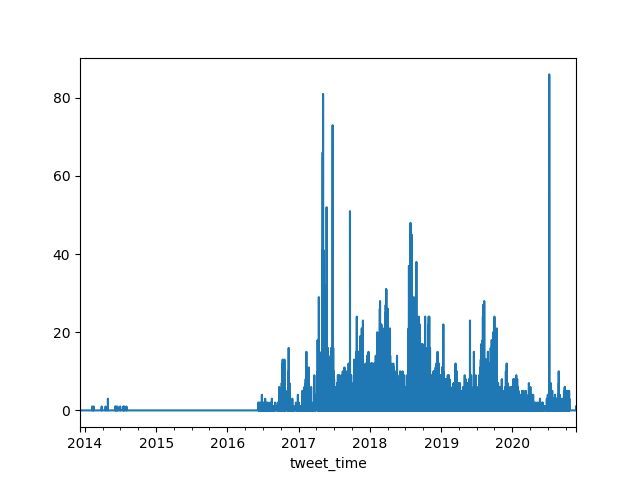

In [75]:
resampled = tweets_series.resample('1h')
plt.figure()
resampled.size().plot()
plt.show()

In [76]:
by_user = tweets_series.groupby('userid').resample('1h')
pivot = pd.pivot_table(pd.DataFrame(by_user.size()), 
                       index=['tweet_time'], 
                       columns=['userid'])

<IPython.core.display.Javascript object>


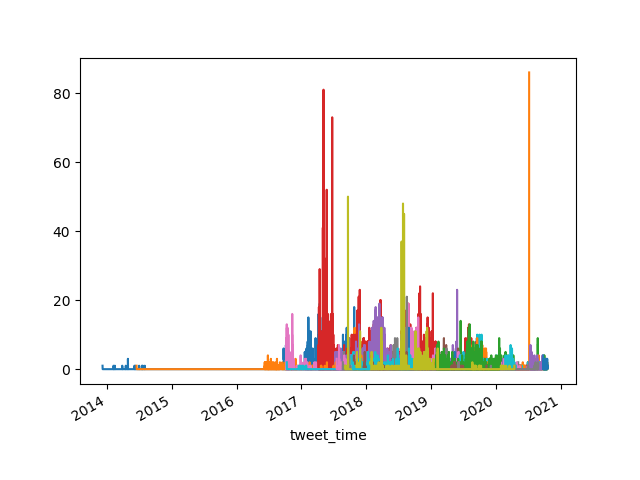

In [77]:
fig = pivot.plot(legend=False)
plt.show()

In [78]:
by_user_day = tweets_series.groupby('userid').resample('1d')
pivot_day = pd.pivot_table(pd.DataFrame(by_user_day.size()), 
                           index=['tweet_time'], 
                           columns=['userid'])

<IPython.core.display.Javascript object>


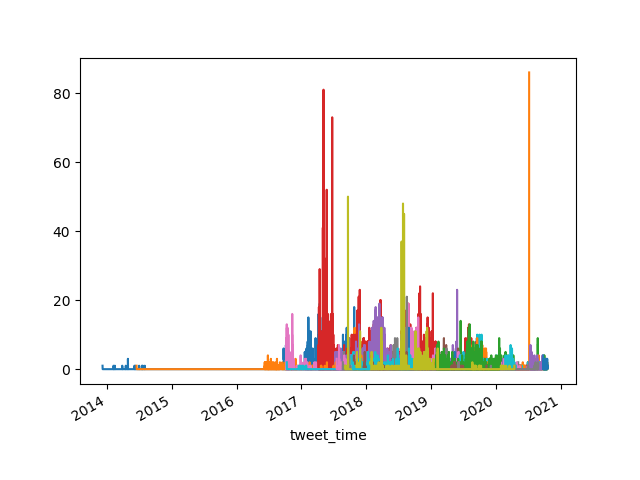

<IPython.core.display.Javascript object>


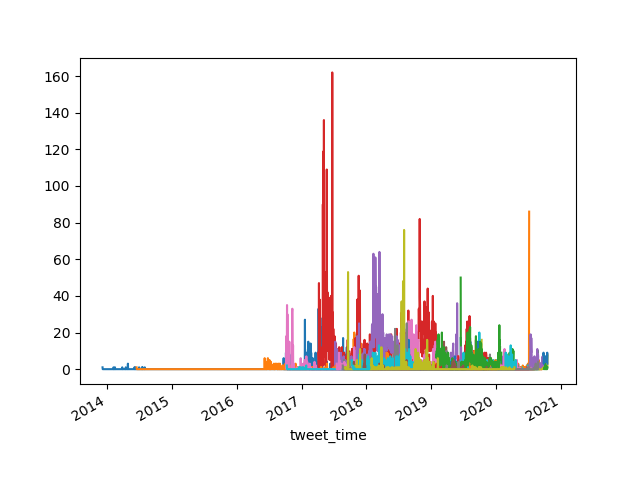

In [82]:
pivot.plot(legend=False, label='hourly')
pivot_day.plot(legend=False, label='daily')
fig.show()